In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

df=pd.read_csv("data_news.csv",encoding = 'latin1')
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vyshn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vyshn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vyshn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, keep trying to be perf...   
4  First, the bad news: Soda bread, corned beef a...   

                             keywords  Unnamed: 5  Unnamed: 6  
0                     running-lessons         NaN         NaN  
1           talking-to-yourself-crazy         NaN         NaN  
2  crenezumab-alzheimers-disease-drug         NaN         NaN  
3                     meaningful-life         NaN         NaN  
4                    green-superfoods         NaN         NaN

### PREPORCESSING

In [4]:
df=df.dropna(axis=1)
df.head()

category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  
0  Resting is part of training. I've confirmed wh...  
1  Think of talking to yourself as a tool to coac...  
2  The clock is ticking for the United States to ...  
3  If you want to be busy, keep trying to be perf...  
4  First, the bad news: Soda bread, corned beef a...

In [6]:
#checking null values
df.isnull().sum()

category             0
headline             0
links                0
short_description    0
dtype: int64

In [8]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    #remove url
    text = re.sub(r'http\S+','',text)
    #lower
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    #tokenize
    tokens = word_tokenize(text)

   
    #stopword removal
    tokens = [word for word in tokens if word not in stop_words]
    #lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    cleaned_text = ' '.join(tokens)
    return cleaned_text

df['clean_headline'] = df['headline'].apply(preprocess_text)
df['clean_short_description'] = df['short_description'].apply(preprocess_text)

df['processed_text'] = df['clean_headline'] + ' ' + df['clean_short_description']

df['processed_text'].head()

0    143 mile 35 day lesson learned resting part tr...
1    talking crazy crazy helpful think talking tool...
2    crenezumab trial gauge whether alzheimers drug...
3    oh difference made want busy keep trying perfe...
4    green superfoods first bad news soda bread cor...
Name: processed_text, dtype: object

In [10]:
from collections import Counter

# Function to get top N words for each category
def get_top_words_per_category(df, column, n=10):
    top_words = {}
    for category in df['category'].unique():
        text = ' '.join(df[df['category'] == category][column])
        tokens = text.split()
        top_words[category] = Counter(tokens).most_common(n)
    return top_words

# Get top words
top_words_per_category = get_top_words_per_category(df, 'processed_text', n=10)
for category, words in top_words_per_category.items():
    print(f"Top words in {category}: {words}")

Top words in WELLNESS: [('life', 889), ('health', 660), ('time', 657), ('u', 614), ('one', 613), ('way', 587), ('people', 587), ('study', 521), ('day', 495), ('new', 481)]
Top words in POLITICS: [('state', 578), ('republican', 525), ('u', 489), ('new', 462), ('say', 457), ('clinton', 409), ('gop', 406), ('american', 369), ('one', 351), ('people', 346)]
Top words in ENTERTAINMENT: [('new', 742), ('film', 498), ('star', 435), ('movie', 426), ('show', 404), ('one', 392), ('year', 370), ('first', 342), ('say', 317), ('time', 296)]
Top words in TRAVEL: [('photo', 1005), ('travel', 938), ('world', 731), ('hotel', 643), ('new', 620), ('one', 584), ('best', 570), ('city', 548), ('day', 466), ('place', 455)]
Top words in STYLE & BEAUTY: [('photo', 2791), ('style', 1023), ('fashion', 1008), ('look', 834), ('week', 741), ('new', 672), ('check', 553), ('dress', 547), ('want', 470), ('u', 442)]
Top words in PARENTING: [('kid', 1457), ('child', 1438), ('parent', 1010), ('mom', 768), ('baby', 755), (

In [12]:
df.head()

category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, keep trying to be perf...   
4  First, the bad news: Soda bread, corned beef a...   

                                      clean_headline  \
0                     143 mile 35 day lesson learned   
1                        talking crazy crazy helpful   
2  crenezumab trial gauge whether alzheimers drug...   
3                                 oh difference made   
4                                   green superfoods   

                             clean_short_description  \
0  resting part training ive confirmed sort alrea...   
1  think talking tool coach challenge narrate exp...   
2  clock ticking united state find cure team work...   
3  want busy keep trying perfect want happy focus...   
4  first bad news soda bread corned beef beer hig...   

                                      processed_text  
0  143 mile 35 day lesson learned resting part tr...  
1  talking crazy crazy helpful think talking tool...  
2  crenezumab trial gauge whether alzheimers drug...  
3  oh difference made want busy keep trying perfe...  
4  green superfoods first bad news soda bread cor...

### Exploratory Data Analysis

In [15]:
#class distribution
category_counts = df["category"].value_counts()
print(category_counts)

category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: count, dtype: int64


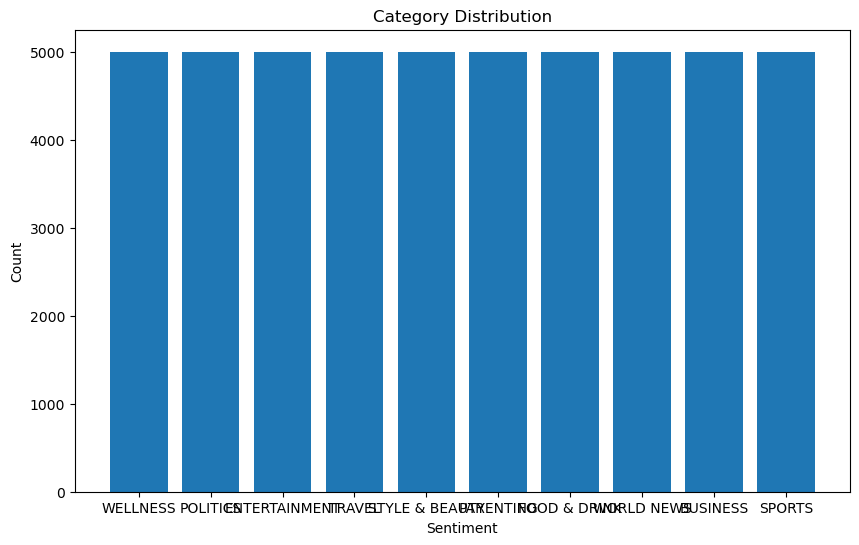

In [17]:
plt.figure(figsize=(10,6))
plt.bar(category_counts.index,category_counts.values)
plt.title("Category Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

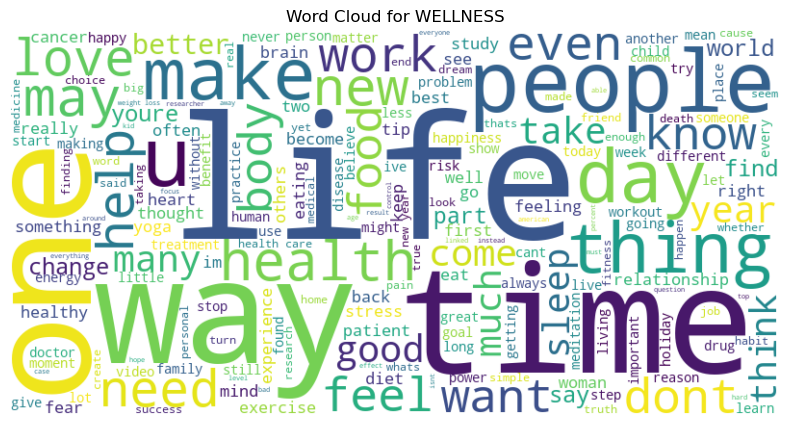

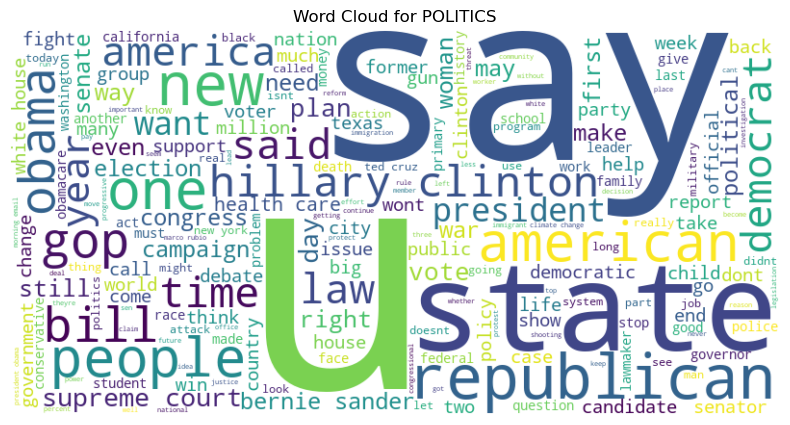

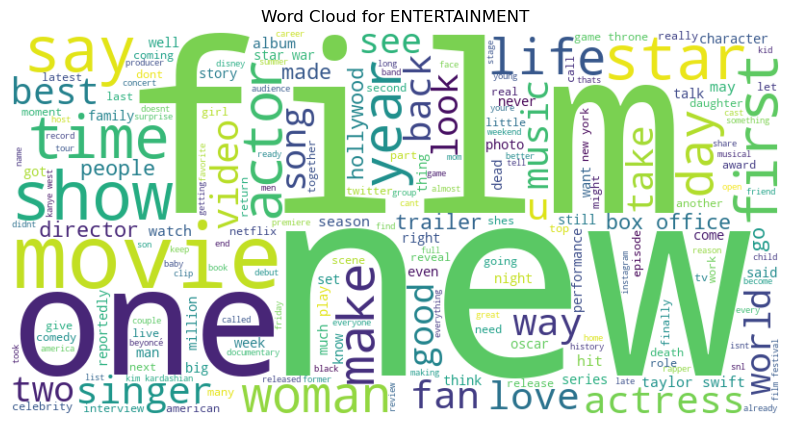

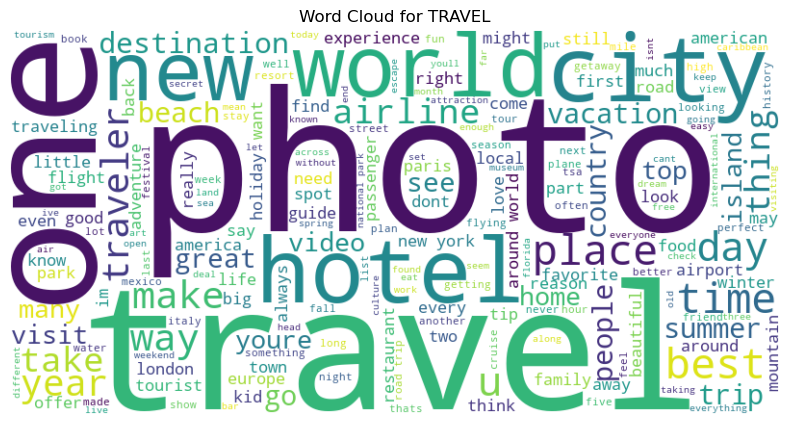

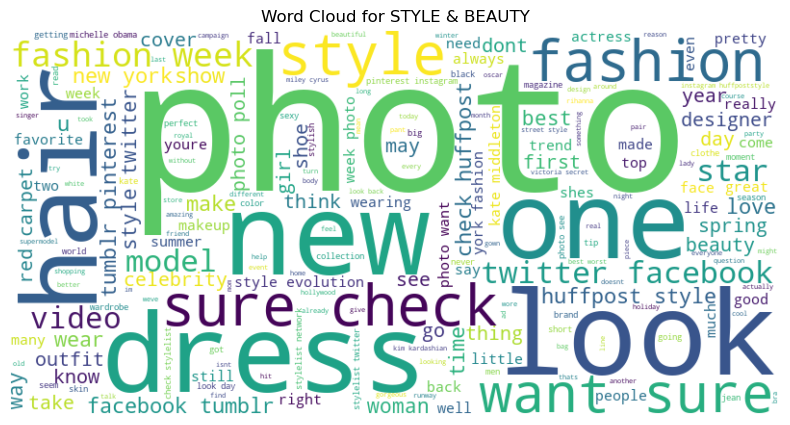

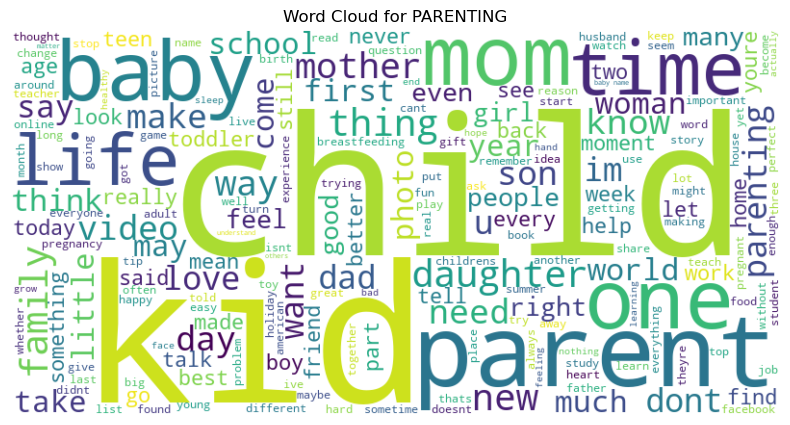

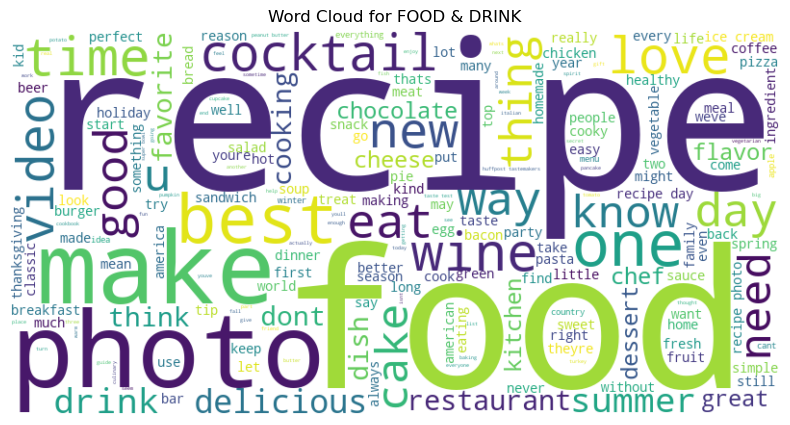

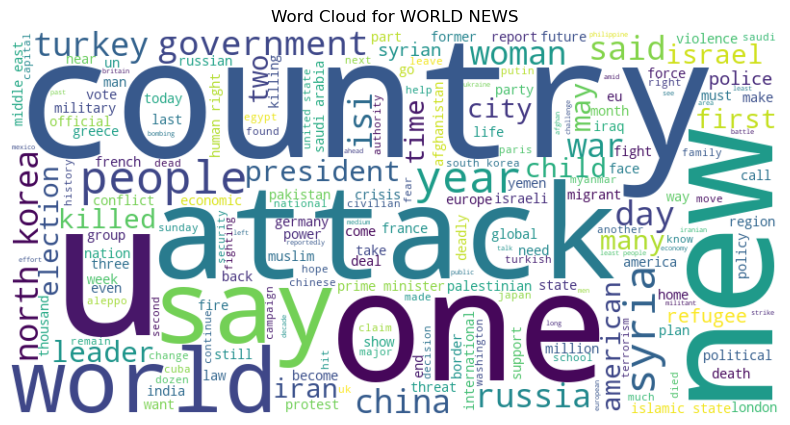

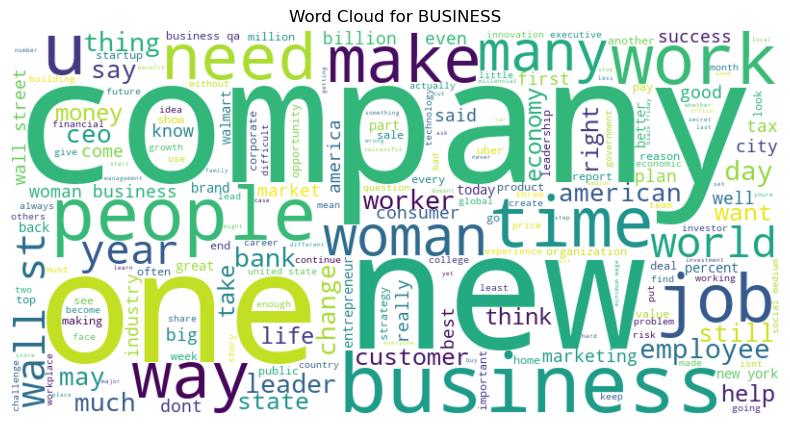

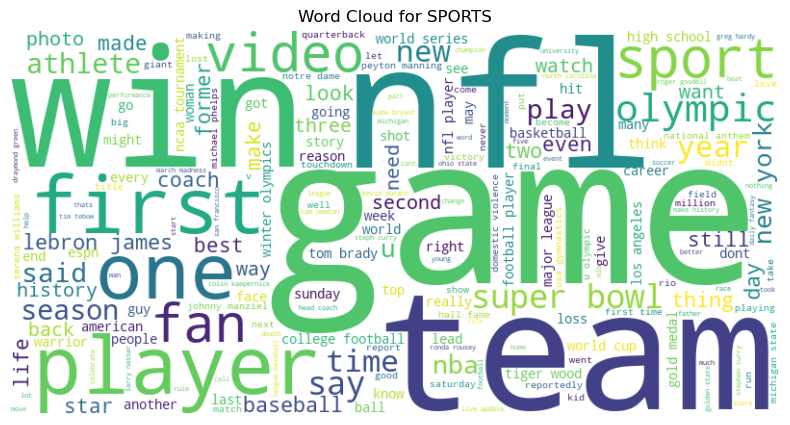

In [21]:
#wordcloud
from wordcloud import WordCloud

# Generate word cloud for each category
for category in df['category'].unique():
    text = ' '.join(df[df['category'] == category]['processed_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category}')
    plt.show()

In [23]:
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
from sklearn.model_selection import train_test_split

X = df['processed_text']
y = df['category']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42,stratify = y)

print("Training set size:", X_train.shape,y_train.shape)
print("Testing set size:", X_test.shape,y_test.shape)

Training set size: (40000,) (40000,)
Testing set size: (10000,) (10000,)


In [25]:
#fit on trainig data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Training set",X_train_tfidf.shape)
print("Testing Set",X_test_tfidf.shape)



Training set (40000, 5000)
Testing Set (10000, 5000)


### Model Development and Evaluation

In [28]:
#logistic regresiion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix
lr_model = LogisticRegression()

#fit train set
lr_model.fit(X_train_tfidf,y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuray",accuracy_score(y_test,y_pred_lr))
print("\nClassification Report:\n",classification_report(y_test,y_pred_lr))


Logistic Regression Accuray 0.7932

Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.75      0.77      0.76      1000
 ENTERTAINMENT       0.76      0.77      0.76      1000
  FOOD & DRINK       0.84      0.86      0.85      1000
     PARENTING       0.76      0.77      0.76      1000
      POLITICS       0.76      0.74      0.75      1000
        SPORTS       0.88      0.89      0.89      1000
STYLE & BEAUTY       0.87      0.83      0.85      1000
        TRAVEL       0.79      0.77      0.78      1000
      WELLNESS       0.72      0.76      0.74      1000
    WORLD NEWS       0.81      0.78      0.79      1000

      accuracy                           0.79     10000
     macro avg       0.79      0.79      0.79     10000
  weighted avg       0.79      0.79      0.79     10000



In [30]:
# Predict probabilities for ROC-AUC score
y_pred_prob_lr = lr_model.predict_proba(X_test_tfidf)

print("\nROC-AUC-SCORE:",roc_auc_score(y_test,y_pred_prob_lr, multi_class='ovr', average='weighted'))


ROC-AUC-SCORE: 0.9717344111111109


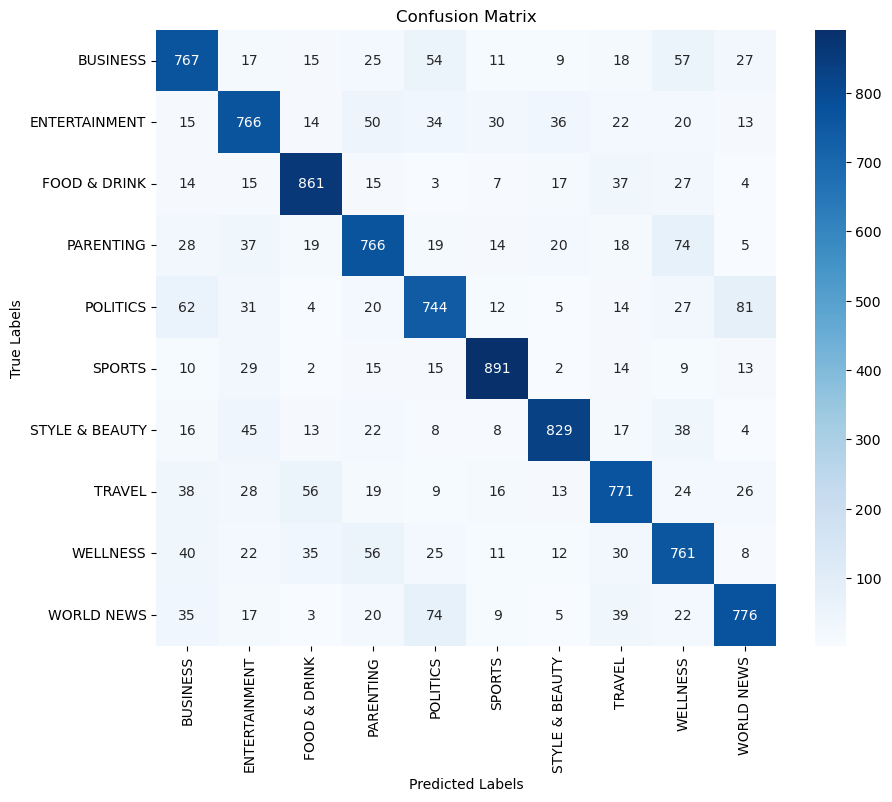

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=lr_model.classes_, 
            yticklabels=lr_model.classes_)

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [36]:
#SVM
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf,y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

print("Accuaracy Score:",accuracy_score(y_test,y_pred_svm))
print("\nClassification Report:\n",classification_report(y_test,y_pred_svm))


Accuaracy Score: 0.7927

Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.76      0.80      0.78      1000
 ENTERTAINMENT       0.78      0.75      0.76      1000
  FOOD & DRINK       0.83      0.86      0.84      1000
     PARENTING       0.75      0.76      0.76      1000
      POLITICS       0.76      0.74      0.75      1000
        SPORTS       0.87      0.92      0.89      1000
STYLE & BEAUTY       0.86      0.84      0.85      1000
        TRAVEL       0.79      0.78      0.79      1000
      WELLNESS       0.73      0.72      0.73      1000
    WORLD NEWS       0.81      0.75      0.78      1000

      accuracy                           0.79     10000
     macro avg       0.79      0.79      0.79     10000
  weighted avg       0.79      0.79      0.79     10000



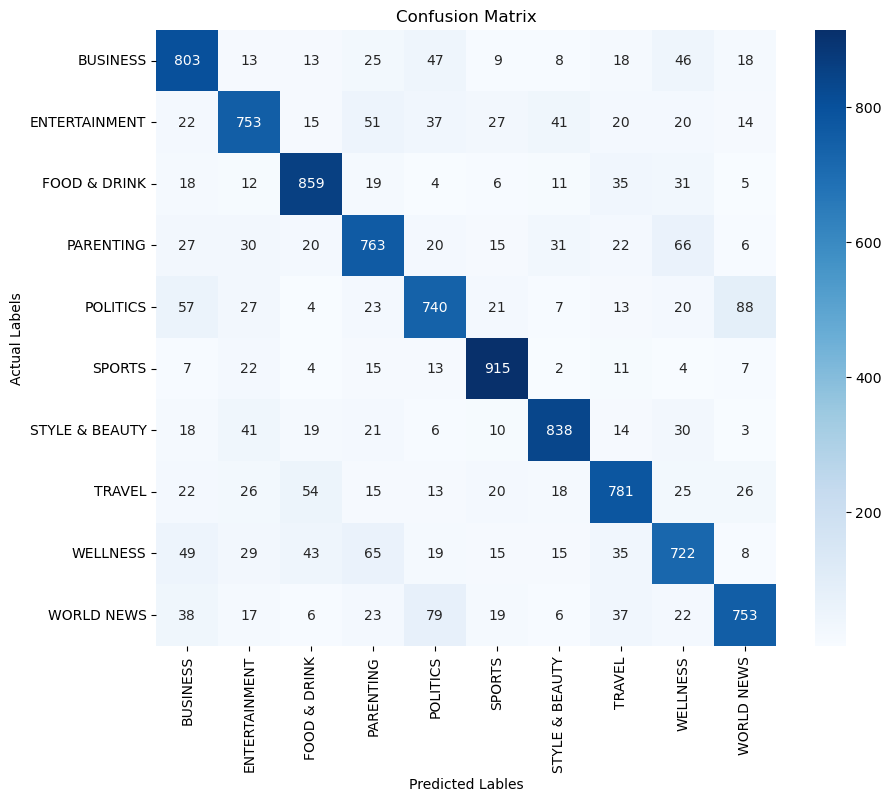

In [38]:
conf_matrix_svm = confusion_matrix(y_test,y_pred_svm)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix_svm,annot = True,fmt='d',cmap='Blues',xticklabels=svm_model.classes_,yticklabels=svm_model.classes_)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Lables')
plt.ylabel('Actual Labels')
plt.show()

In [40]:
#NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf,y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

print("Accuracy_score:",accuracy_score(y_test,y_pred_nb))
print("\nClassification Report\n",classification_report(y_test,y_pred_nb))

Accuracy_score: 0.7768

Classification Report
                 precision    recall  f1-score   support

      BUSINESS       0.75      0.71      0.73      1000
 ENTERTAINMENT       0.79      0.76      0.77      1000
  FOOD & DRINK       0.80      0.86      0.83      1000
     PARENTING       0.68      0.76      0.72      1000
      POLITICS       0.76      0.72      0.74      1000
        SPORTS       0.88      0.83      0.85      1000
STYLE & BEAUTY       0.87      0.82      0.84      1000
        TRAVEL       0.76      0.78      0.77      1000
      WELLNESS       0.71      0.73      0.72      1000
    WORLD NEWS       0.79      0.79      0.79      1000

      accuracy                           0.78     10000
     macro avg       0.78      0.78      0.78     10000
  weighted avg       0.78      0.78      0.78     10000



In [42]:
# Predict probabilities for ROC-AUC score
y_pred_prob_nb = nb_model.predict_proba(X_test_tfidf)

print("\nROC-AUC-SCORE:",roc_auc_score(y_test,y_pred_prob_nb, multi_class='ovr', average='weighted'))


ROC-AUC-SCORE: 0.970103411111111


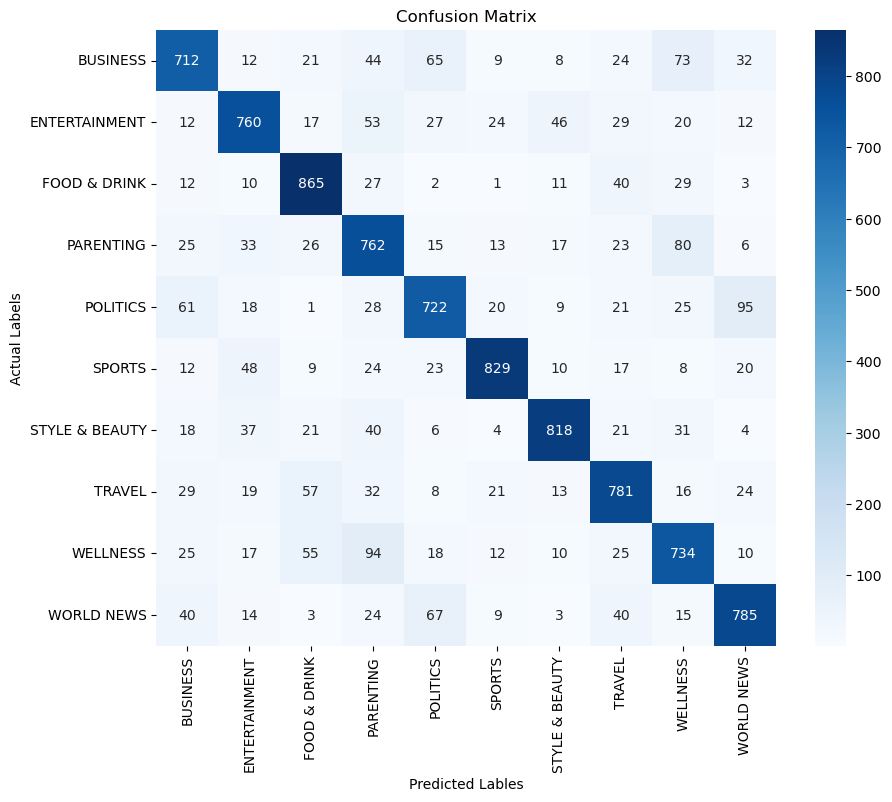

In [44]:
conf_matrix_nb = confusion_matrix(y_test,y_pred_nb)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix_nb,annot = True,fmt='d',cmap='Blues',xticklabels=svm_model.classes_,yticklabels=svm_model.classes_)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Lables')
plt.ylabel('Actual Labels')
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV
#hyper parameter tuning Logistic Regression Model
param_grid_lr = {
    'C': [0.1, 1, 10], 
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithms
    'class_weight': [None,'balanced'] 
}

# Perform Grid Search with cross-validation
grid_search_lr = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid_lr,
    cv=5,  
    scoring='accuracy'
)
grid_search_lr.fit(X_train_tfidf, y_train)

# Best parameters and score
print("Best Parameters (Logistic Regression):", grid_search_lr.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_lr.best_score_)


Best Parameters (Logistic Regression): {'C': 1, 'class_weight': None, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.794225


In [58]:
# Evaluate on test data
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr1 = best_lr_model.predict(X_test_tfidf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr1))


Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.75      0.77      0.76      1000
 ENTERTAINMENT       0.76      0.77      0.76      1000
  FOOD & DRINK       0.84      0.86      0.85      1000
     PARENTING       0.76      0.77      0.76      1000
      POLITICS       0.76      0.74      0.75      1000
        SPORTS       0.88      0.89      0.89      1000
STYLE & BEAUTY       0.87      0.83      0.85      1000
        TRAVEL       0.79      0.77      0.78      1000
      WELLNESS       0.72      0.76      0.74      1000
    WORLD NEWS       0.81      0.78      0.79      1000

      accuracy                           0.79     10000
     macro avg       0.79      0.79      0.79     10000
  weighted avg       0.79      0.79      0.79     10000



In [70]:
print("Accuracy:",accuracy_score(y_test,y_pred_lr1))

Accuracy: 0.7932


In [74]:
param_grid_svm = {
    'C': [0.1, 1, 10],  
    'class_weight': [None, 'balanced']  
}

# Perform Grid Search with cross-validation
grid_search_svm = GridSearchCV(
    LinearSVC(random_state=42, max_iter=1000),
    param_grid_svm,
    cv=5,  
    scoring='accuracy'
)
grid_search_svm.fit(X_train_tfidf, y_train)

# Best parameters and score
print("Best Parameters (SVM):", grid_search_svm.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_svm.best_score_)

Best Parameters (SVM): {'C': 0.1, 'class_weight': None}
Best Cross-Validation Accuracy: 0.797175


In [76]:
# Train the best SVM model
best_svm_model = grid_search_svm.best_estimator_
best_svm_model.fit(X_train_tfidf, y_train)

# Evaluate on test data
y_pred_svm1 = best_svm_model.predict(X_test_tfidf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm1))



Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.76      0.75      0.75      1000
 ENTERTAINMENT       0.79      0.75      0.77      1000
  FOOD & DRINK       0.82      0.87      0.85      1000
     PARENTING       0.76      0.77      0.77      1000
      POLITICS       0.77      0.74      0.76      1000
        SPORTS       0.86      0.89      0.88      1000
STYLE & BEAUTY       0.85      0.84      0.85      1000
        TRAVEL       0.79      0.77      0.78      1000
      WELLNESS       0.73      0.76      0.74      1000
    WORLD NEWS       0.80      0.79      0.79      1000

      accuracy                           0.79     10000
     macro avg       0.79      0.79      0.79     10000
  weighted avg       0.79      0.79      0.79     10000



In [78]:
print("Accuracy:",accuracy_score(y_test,y_pred_svm1))

Accuracy: 0.7938


In [64]:

param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 10.0]  
}

# Perform Grid Search with cross-validation
grid_search_nb = GridSearchCV(
    MultinomialNB(),
    param_grid_nb,
    cv=5,  
    scoring='accuracy',
    n_jobs=-1
)
grid_search_nb.fit(X_train_tfidf, y_train)

# Best parameters and score
print("Best Parameters (Naive Bayes):", grid_search_nb.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_nb.best_score_)


Best Parameters (Naive Bayes): {'alpha': 1.0}
Best Cross-Validation Accuracy: 0.78065


In [66]:
best_nb_model = grid_search_nb.best_estimator_
best_nb_model.fit(X_train_tfidf,y_train)

y_pred_nb1 = best_nb_model.predict(X_test_tfidf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb1))


Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.75      0.71      0.73      1000
 ENTERTAINMENT       0.79      0.76      0.77      1000
  FOOD & DRINK       0.80      0.86      0.83      1000
     PARENTING       0.68      0.76      0.72      1000
      POLITICS       0.76      0.72      0.74      1000
        SPORTS       0.88      0.83      0.85      1000
STYLE & BEAUTY       0.87      0.82      0.84      1000
        TRAVEL       0.76      0.78      0.77      1000
      WELLNESS       0.71      0.73      0.72      1000
    WORLD NEWS       0.79      0.79      0.79      1000

      accuracy                           0.78     10000
     macro avg       0.78      0.78      0.78     10000
  weighted avg       0.78      0.78      0.78     10000



In [72]:
print("Accuracy:",accuracy_score(y_test,y_pred_nb1))

Accuracy: 0.7768


#### Saving the Best model

In [86]:
import joblib

#save the model
joblib.dump(best_svm_model,'best_svm_model.joblib')


['best_svm_model.joblib']

In [90]:
#save TF-IDF Vectorizer
joblib.dump(tfidf,'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [92]:
#load the model
best_svm_model = joblib.load('best_svm_model.joblib')
tfidf = joblib.load('tfidf_vectorizer.joblib')

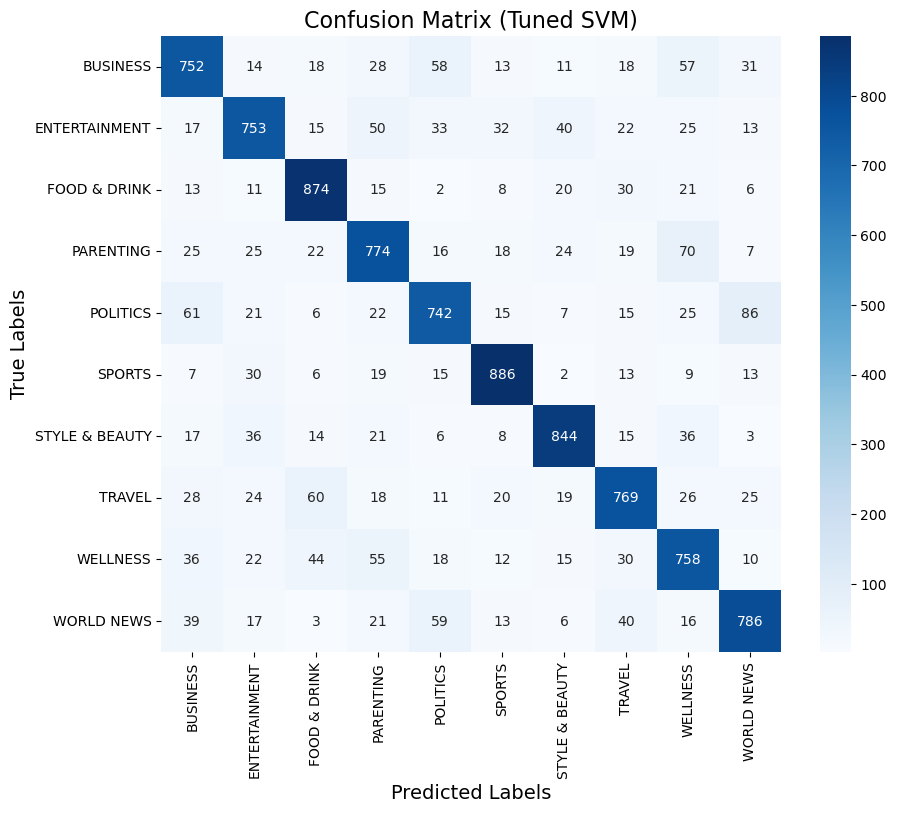

In [106]:
#tuned model insights
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm1)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_svm_model.classes_,
            yticklabels=best_svm_model.classes_)

plt.title('Confusion Matrix (Tuned SVM)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

Top features for BUSINESS: [('marketing', 1.5998711564739523), ('bank', 1.6600308596777473), ('uber', 1.6654111009353434), ('walmart', 1.6669727948718946), ('247', 1.6941398804763197), ('customer', 1.8584871406445584), ('leadership', 1.860939932189025), ('ceo', 1.9656550856948762), ('company', 2.175335115184601), ('business', 2.6050434655840586)]
Top features for ENTERTAINMENT: [('actress', 1.5201981512723106), ('music', 1.5688942665727967), ('throne', 1.61569009522849), ('jenner', 1.9873140880705185), ('movie', 2.0130411474039343), ('album', 2.042618830308174), ('singer', 2.110341026906834), ('actor', 2.169136229078003), ('trailer', 2.1740084722768165), ('film', 2.3796699604015834)]
Top features for FOOD & DRINK: [('tastemakers', 1.6020436205888617), ('cook', 1.6147526192094388), ('chef', 1.6524376602354507), ('taste', 1.7253905654033754), ('cheese', 1.7612368072300917), ('cooking', 1.889724439098905), ('wine', 2.1086841282159874), ('food', 2.1910622731087623), ('cocktail', 2.25236517

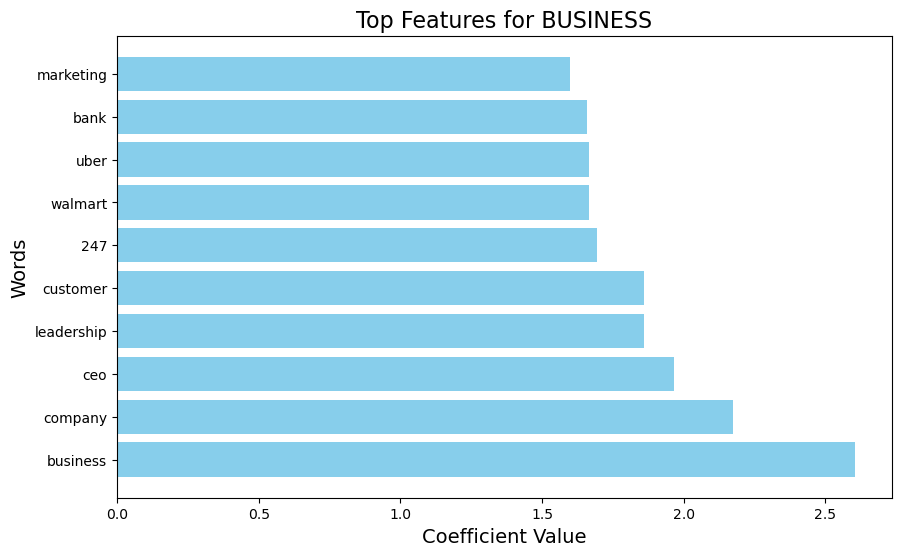

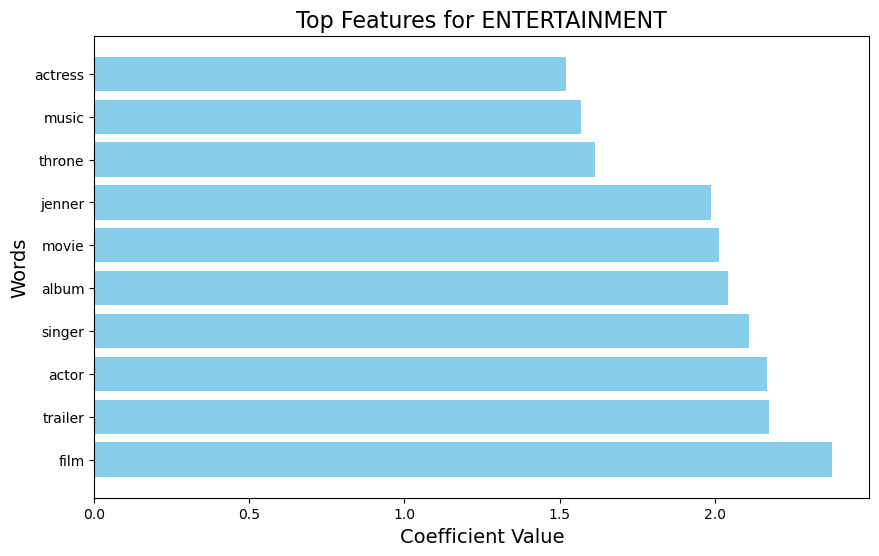

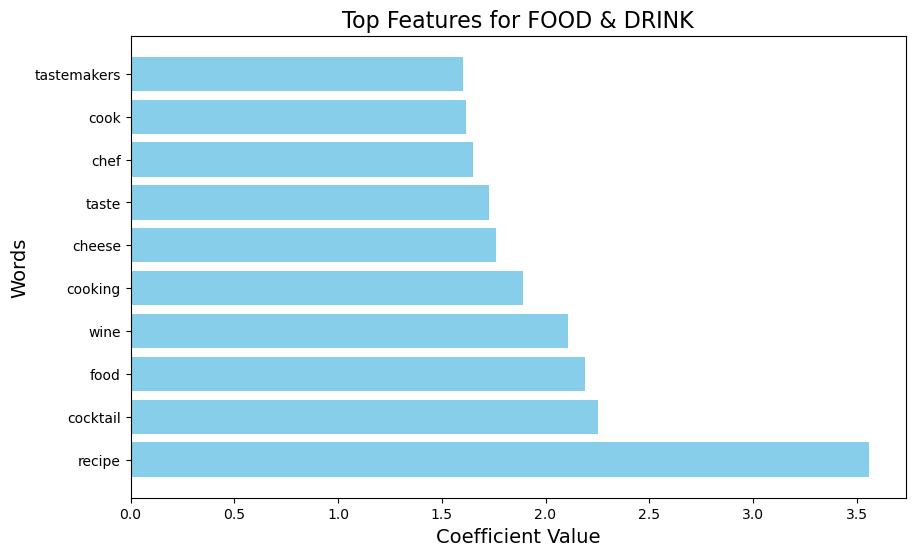

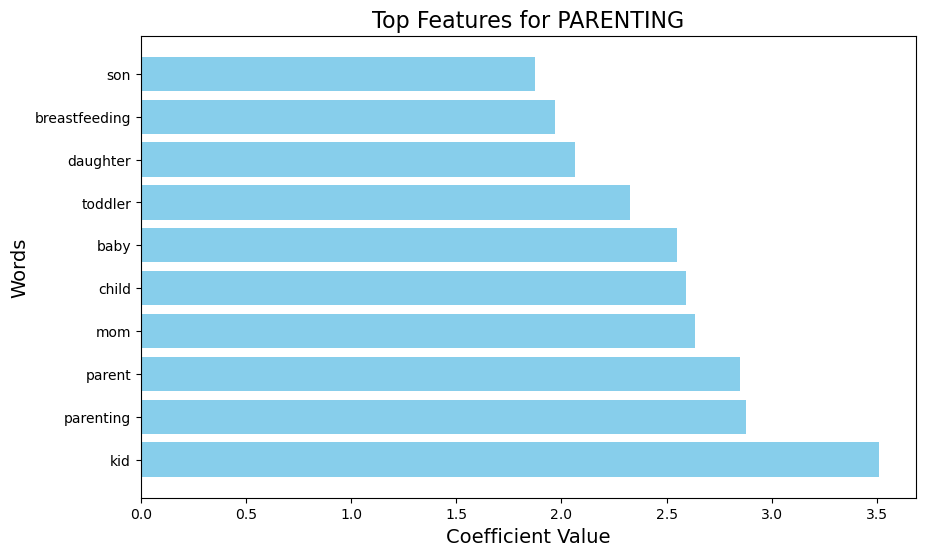

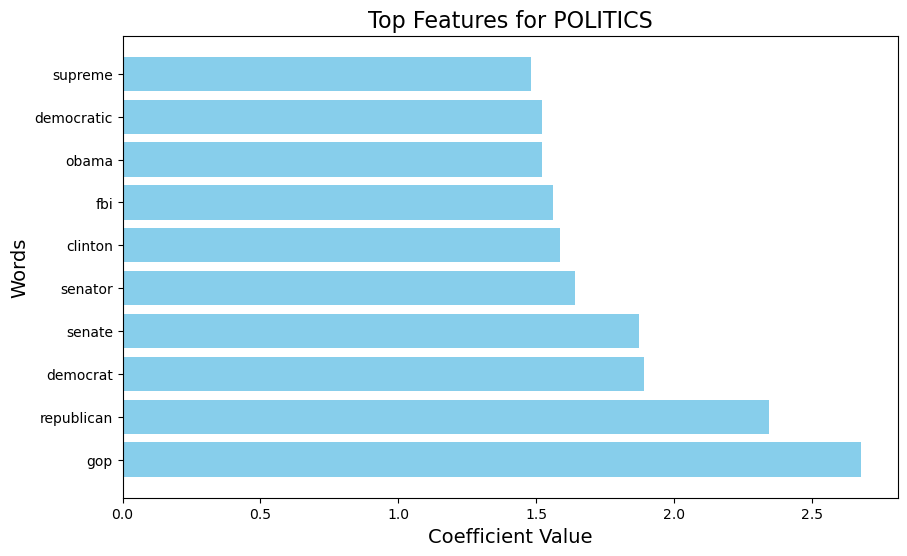

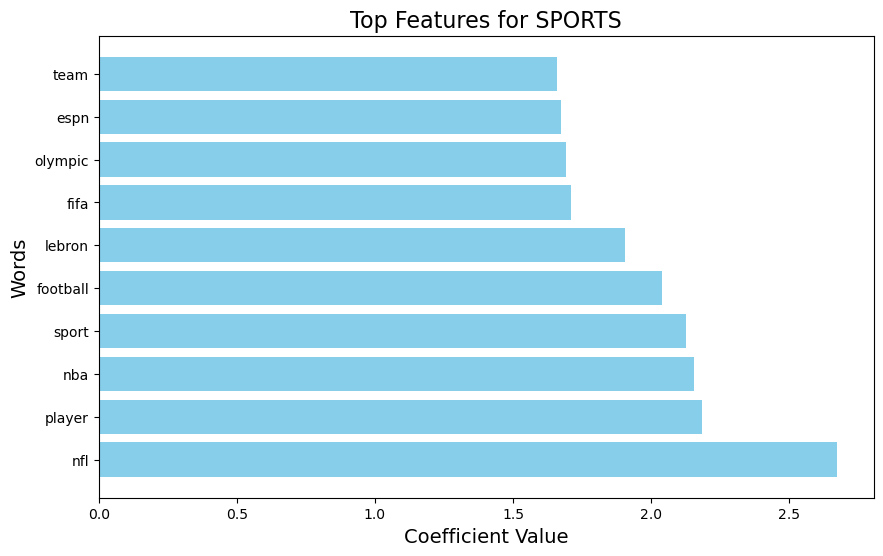

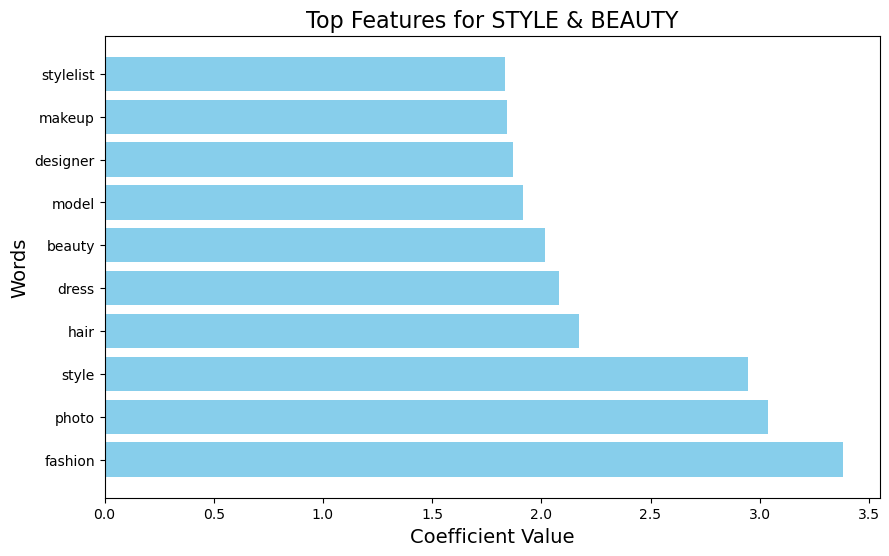

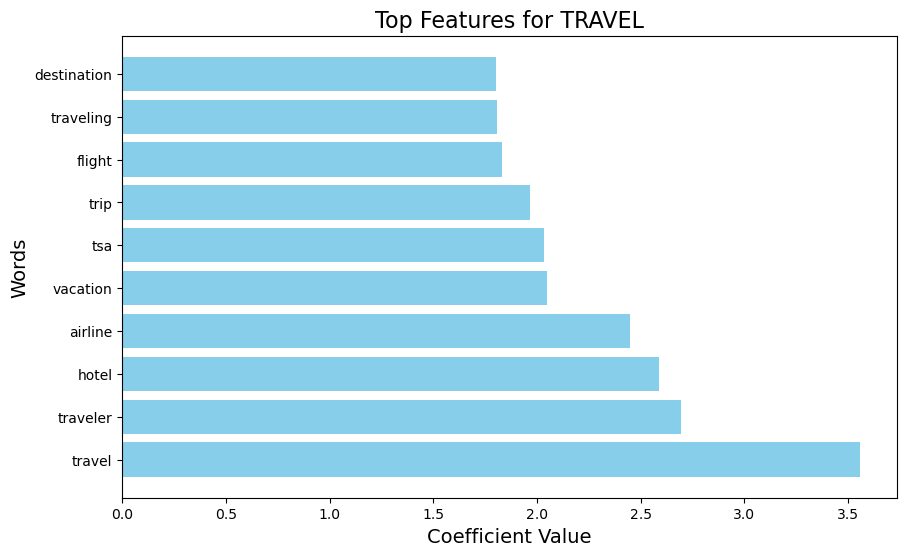

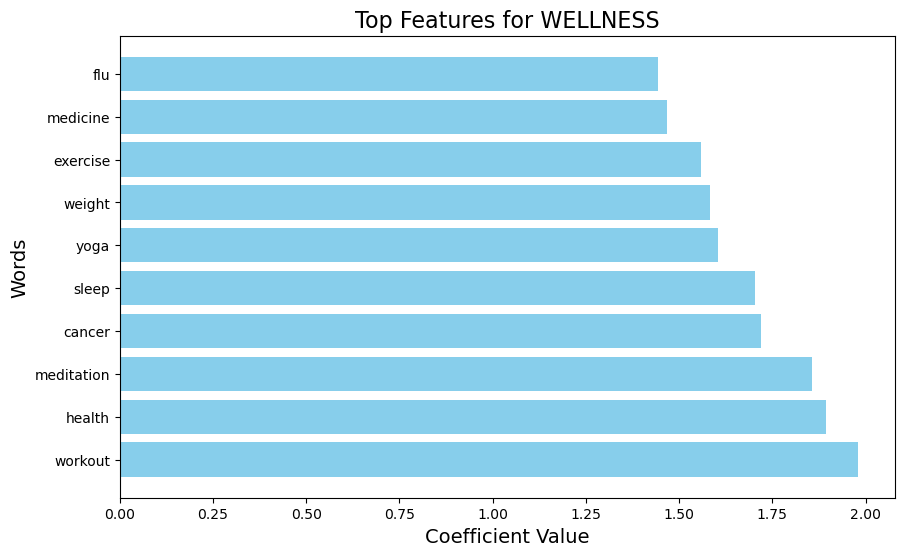

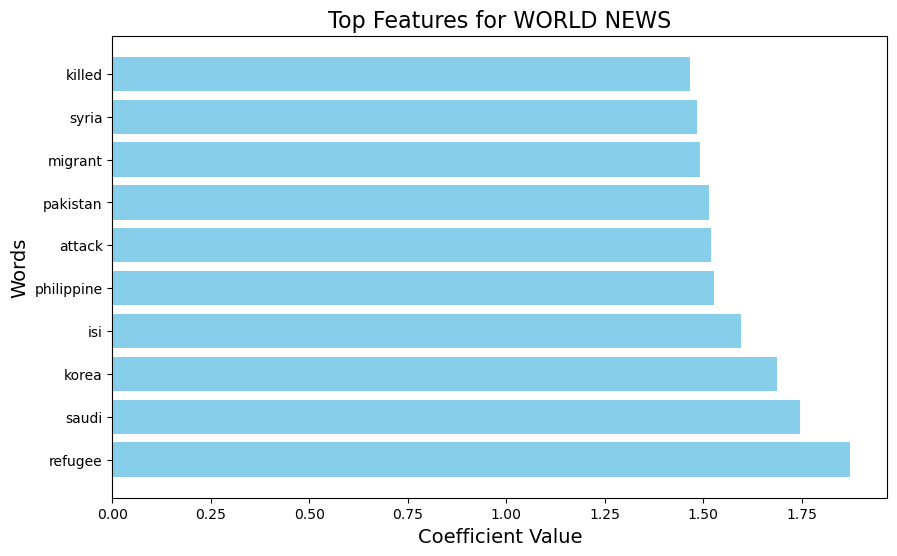

In [110]:

# Get feature names from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Get coefficients from the SVM model
coefficients = best_svm_model.coef_

# Function to get top N words for each class
def get_top_features_per_class(coefficients, feature_names, top_n=10):
    top_features = {}
    for i, class_label in enumerate(best_svm_model.classes_):
        top_indices = np.argsort(coefficients[i])[-top_n:]  # Top positive features
        top_features[class_label] = [(feature_names[j], coefficients[i][j]) for j in top_indices]
    return top_features

# Get top features
top_features = get_top_features_per_class(coefficients, feature_names, top_n=10)

# Print top features
for class_label, features in top_features.items():
    print(f"Top features for {class_label}: {features}")

# Plot top features for each class
for class_label, features in top_features.items():
    words, scores = zip(*features)
    plt.figure(figsize=(10, 6))
    plt.barh(words, scores, color='skyblue')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.title(f'Top Features for {class_label}', fontsize=16)
    plt.xlabel('Coefficient Value', fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.show()

#### Prediction On New Data

In [ ]:

new_data = [
    ("The stock market surged by 2.5% today due to positive economic indicators."),
    ("A new study of 10,000 participants shows the benefits of meditation for mental health."),
    ("The football team won the championship after a thrilling 3-2 match." ),
    ("Scientists discovered a new exoplanet 12 light-years away that may support life."),
    ("Tech companies are investing $5 billion in artificial intelligence research."),
    ("The government announced 7 new policies to tackle climate change."),
    ("A major cybersecurity breach exposed 50 million user accounts worldwide."),
    ("A new organic skincare line promises 24-hour hydration and anti-aging benefits."),
    ("The Lakers secured an 85-78 victory in the final quarter of the game."),
    ("An Olympic sprinter broke the 100m record with a time of 9.58 seconds.")
]
# Preprocess the new data
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Stopword removal
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

#Apply preprocessing to new data
new_data_processed = [preprocess_text(text) for text in new_data]

#Transform the new data using the fitted TfidfVectorizer
new_data_tfidf = tfidf.transform(new_data_processed)

# Make predictions using the trained Logistic Regression model
new_predictions = best_svm_model.predict(new_data_tfidf)

#Display the results
results = pd.DataFrame({
    "Text": new_data,
    "Predicted Category": new_predictions
})
print(results)

                                                Text Predicted Category
0  The stock market surged by 2.5% today due to p...           BUSINESS
1  A new study of 10,000 participants shows the b...           WELLNESS
2  The football team won the championship after a...             SPORTS
3  Scientists discovered a new exoplanet 12 light...           WELLNESS
4  Tech companies are investing $5 billion in art...           BUSINESS
5  The government announced 7 new policies to tac...         WORLD NEWS
6  A major cybersecurity breach exposed 50 millio...           BUSINESS
7  A new organic skincare line promises 24-hour h...           WELLNESS
8  The Lakers secured an 85-78 victory in the fin...             SPORTS
9  An Olympic sprinter broke the 100m record with...             SPORTS


### VIDEO EXPLANATION LINK: 

In [ ]:
https://drive.google.com/file/d/1v2us9QUH91FW9WLmSspnfVwMjRGpuwNG/view?usp=sharing